# EJERCICIO 3



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Ejercicio 3 (Agrupamiento)**

**La empresa productora de vinos no está segura de que la empresa de analiza la calidad de los diferentes vinos esté realizando el trabajo adecuadamente por lo que ha decidido analizar si los diferentes vinos que han sido producidos en los últimos años realmente tienen la calidad identificada.
Para ello se debe aplicar un algoritmo de agrupamiento para comprobar si los vinos realmente se agrupan de manera similar a como han sido valorados por la empresa evaluadora (quality) y realizar las siguientes acciones:**

**1) Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de agrupamiento.**

Para este proceso, realizaremos primero una representación del Dataset mediante un diagrama de cajas que nos bastará para conocer la existencia de outliers. Como sí que hay, los eliminamos del Dataset con el que vamos a trabajar.

Por otro lado, realizaremos una matriz de correlación con el fin de conocer las relaciones entre variables. Una vez realizado, podemos observar que hay gran variedad de relación entre variables, sin embargo, no existe ninguna pareja altamente relacionada, por lo que se decide mantener el mismo número de variables.

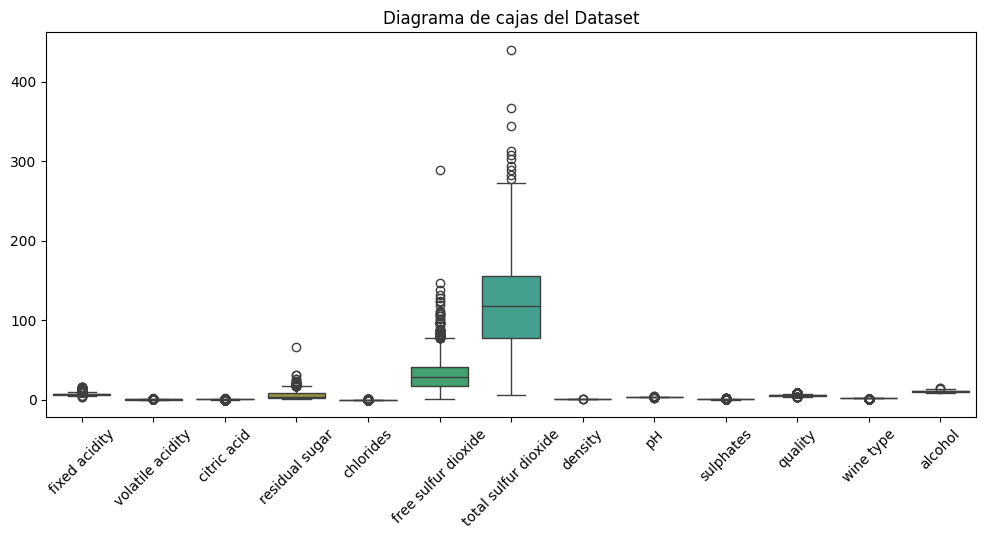

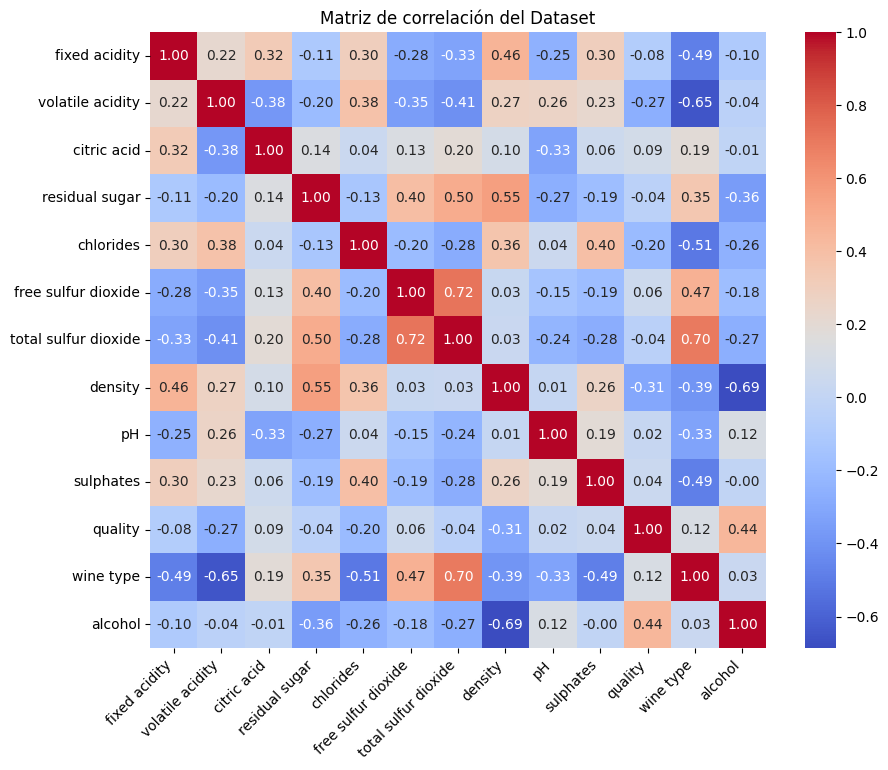

In [11]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('wine_alcohol.csv', sep=';')

# Previsualización del dataset
#print(df)

# Eliminamos la variable id
df.drop('id', axis=1, inplace=True)

# PREPROCESAMIENTO Y LIMPIEZA
# Crear un diagrama de cajas
plt.figure(figsize=(12, 5))
sns.boxplot(data=df)
plt.title('Diagrama de cajas del Dataset')
plt.xticks(rotation=45)
plt.show()

# Función para eliminar outliers según el IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

# Aplicar la función de eliminación de outliers
df_clean = remove_outliers(df)

# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matriz de correlación del Dataset')
plt.show()

**2) Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el valor de k que mejor resultados ofrece. En necesario justificar la selección del mejor valor de k mediante la utilización de datos empíricos.**

En primer, lugar, seleccionamos los datos numéricos de la base de datos ya que el algoritmo K-Means, solo trabaja con variables numéricas, que en este caso, son todos. Después, normalizamos los datos, pues es más fácil trabajar con datos con la misma escala

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


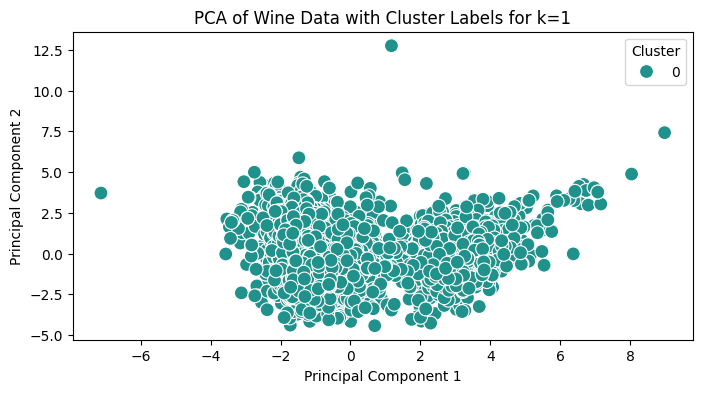

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


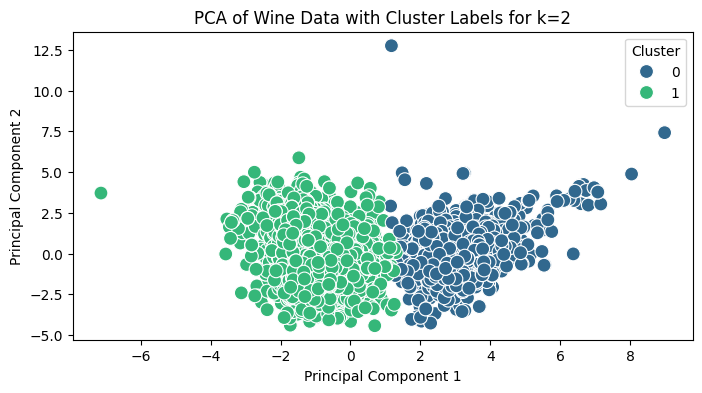

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


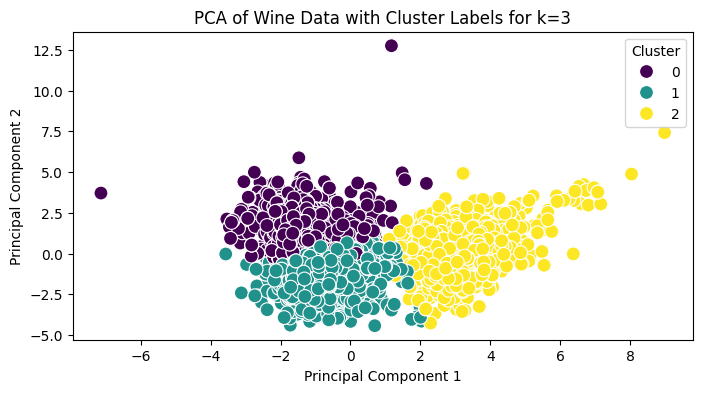

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


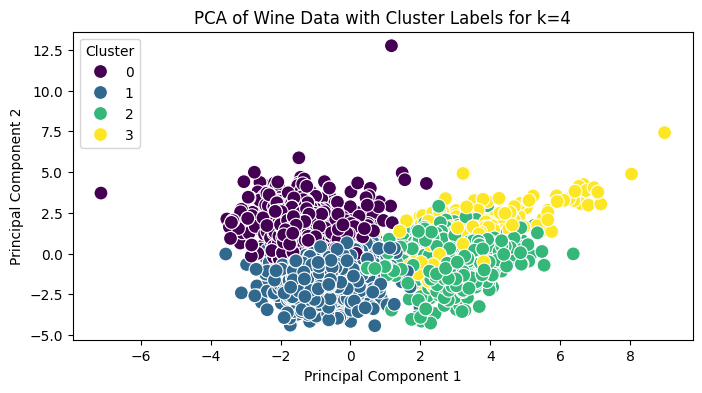

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


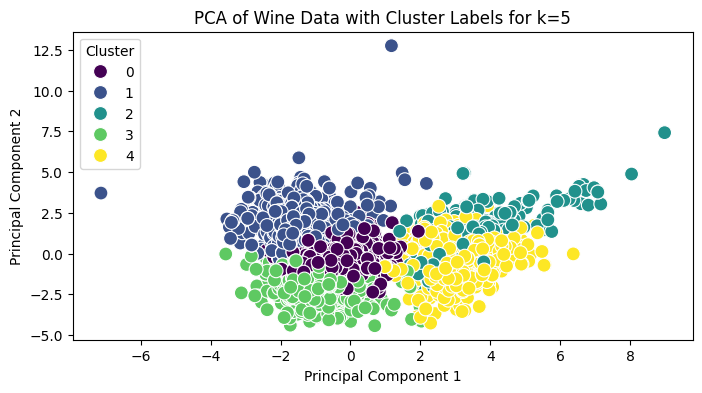

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


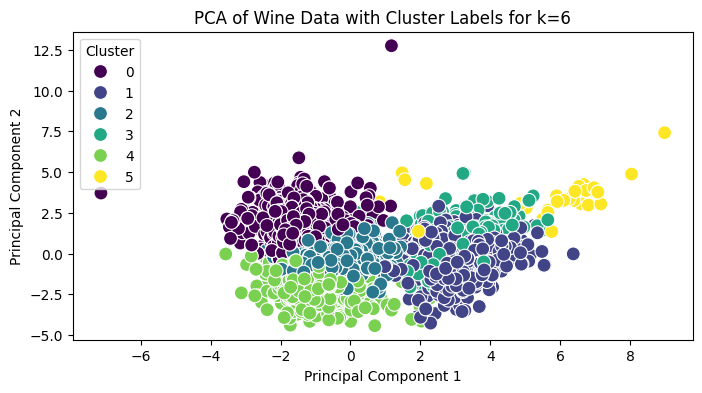

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


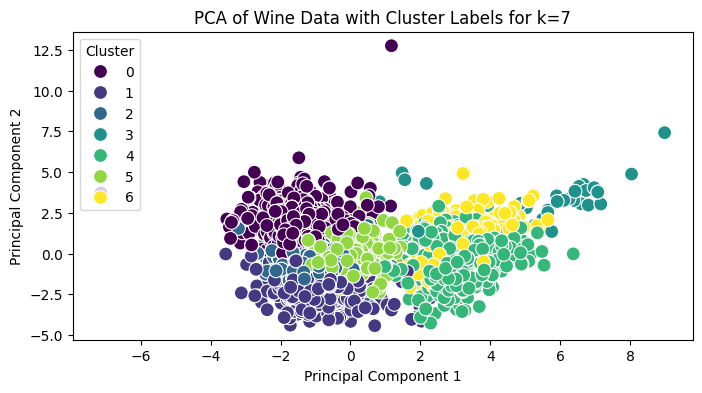

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


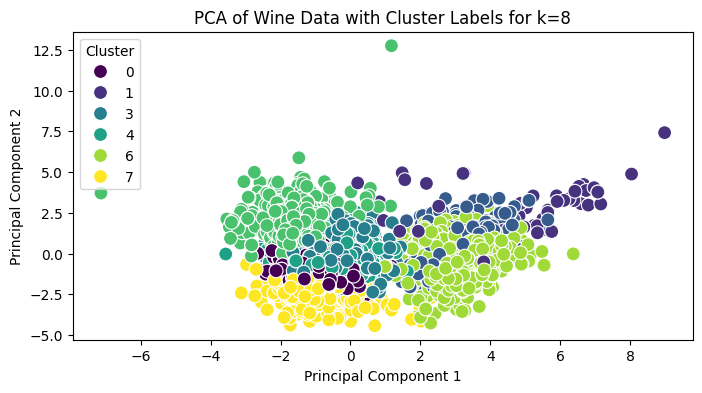

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


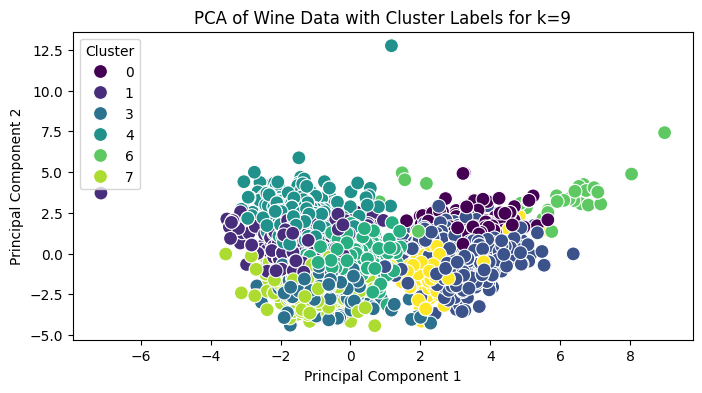

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


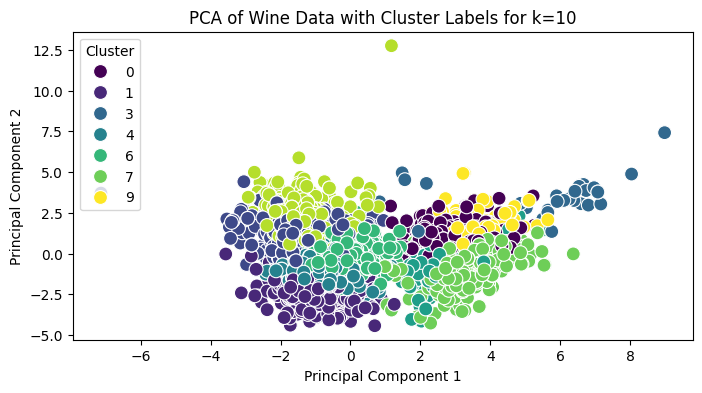

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

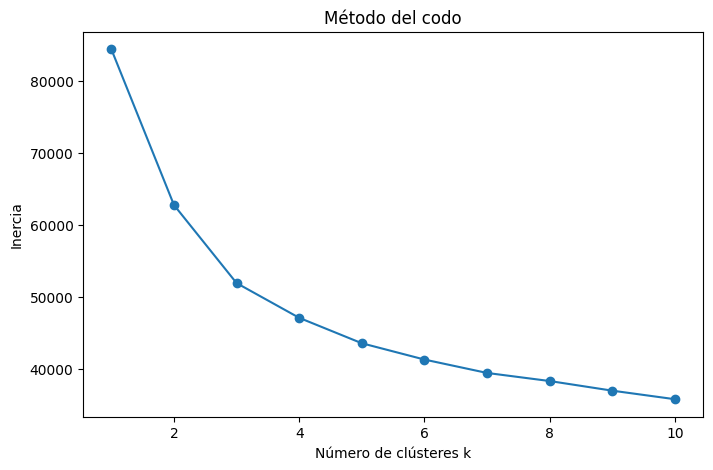

In [12]:
# Seleccionar columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Normalizar los datos
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Aplicar PCA para reducir a 2 dimensiones antes del bucle
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Iterar sobre diferentes valores de k
for k in range(1, 11, 1):
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_normalized)

    # Añadir la asignación de clusters al DataFrame original para visualización
    df['Cluster'] = clusters

    # Gráfico de PCA
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
    plt.title(f'PCA of Wine Data with Cluster Labels for k={k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Aplicar KMeans con el valor de k seleccionado
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Añadir las etiquetas de clúster al DataFrame original
df['cluster'] = clusters

# Obtener los centroides
centroids = kmeans.cluster_centers_

# Convertir los centroides a su forma original (antes de PCA)
centroids_original = scaler.inverse_transform(centroids)

# Método del codo para encontrar el mejor k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres k')
plt.ylabel('Inercia')
plt.show()

Observamos que obtenemos diez gráficos de dispersión, cada uno representando un análisis de componentes principales (PCA) de nuestro conjunto de datos, donde cada gráfico corresponde a un número diferente de clusters (de 1 a 10). Los diferentes colores en los gráficos son los que representan los distintos clusters.

A simple vista, los valores de k=2 y k=3 muestran grupos bien definidos y separados. A medida que k aumenta, los clusters tienden a solaparse más, lo que puede indicar que se está sobreajustando el modelo a los datos.

El valor de k=2 nos muestra dos clusters claramente separados, pero puede ser demasiado simplista para capturar toda la estructura de los datos. Por otro lado, k=3 parece ofrecer una buena separación también, con tres clusters que podrían representar una estructuración más rica de los datos.

Utilizamos el método del codo que funciona evaluando la inercia de los clústeres para diferentes valores de k y observando cómo disminuye esta medida a medida que aumenta k. En nuestro caso, donde el método del codo sugiere k=3 como la mejor opción, se puede interpretar que después de k=3, la disminución en la inercia ya no es tan marcada y la curva se estabiliza, lo que sugiere que agregar más clústeres no proporciona una mejora significativa en la separación de los datos. Por lo tanto, elegir k=3 como el número óptimo de clústeres parece ser una decisión razonable según el análisis del método del codo.

**3) Analiza los clústeres obtenidos para el mejor valor de k y responde a las siguientes preguntas:**

**• ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset?**

**• ¿Cómo se diferencian los clústeres entre sí?
En necesario justificar las respuestas mediante la utilización de datos empíricos.**

In [13]:
# Ejecutando K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Añadiendo los clústeres al conjunto de datos para comparar con la calidad
data_with_clusters = df.copy()
data_with_clusters['cluster'] = clusters

# Agrupando por clúster y 'quality' para ver la distribución
cluster_quality_distribution = data_with_clusters.groupby(['cluster', 'quality']).size().unstack(fill_value=0)

cluster_quality_distribution

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


quality,3,4,5,6,7,8,9
cluster,,,,,,,
0,13,66,881,844,138,18,0
1,7,94,575,1365,747,159,5
2,10,56,682,627,194,16,0


Analicemos las similitudes entre los grupos obtenidos y los valores de la variable "quality":

- Clúster 0: Este clúster tiene una mayor concentración de observaciones para valores de "quality" entre 5 y 6, con un pico en 5. Los valores de "quality" por encima y por debajo de este rango tienen menos observaciones. Esto sugiere que este clúster podría estar asociado con vinos de calidad media, ya que los valores de "quality" más comunes están en el rango medio.

- Clúster 1: Este clúster muestra una distribución más uniforme en los valores de "quality", con una concentración ligeramente más alta en 6 y 7. Sin embargo, también tiene una cantidad significativa de observaciones en los extremos (valores de "quality" 3 y 8). Esto podría indicar que este clúster abarca una gama más amplia de calidades de vino, desde baja a alta, pero con una inclinación hacia la calidad media.

- Clúster 2: Similar al Clúster 0, este clúster muestra una concentración de observaciones en valores de "quality" 5 y 6, aunque en menor medida. Además, tiene una cantidad notable de observaciones en "quality" 7. Esto sugiere que este clúster también está asociado principalmente con vinos de calidad media, pero con una ligera inclinación hacia la calidad alta.

En cuanto a las diferencias entre los clústeres:

- Clúster 0 vs. Clúster 1: Mientras que ambos clústeres muestran una concentración en valores de "quality" 5 y 6, el Clúster 0 tiene menos variación en los extremos y una concentración más alta en 5, mientras que el Clúster 1 tiene una distribución más uniforme en una gama más amplia de valores de "quality", incluidos los extremos.

- Clúster 1 vs. Clúster 2: Aunque ambos clústeres muestran una concentración en valores de "quality" 6 y 7, el Clúster 1 tiene una distribución más uniforme en una gama más amplia de valores de "quality", mientras que el Clúster 2 tiene una concentración ligeramente más alta en 5 y una cantidad significativa de observaciones en 7.

- Clúster 0 vs. Clúster 2: Ambos clústeres muestran una concentración en valores de "quality" 5 y 6, pero el Clúster 0 tiene una concentración más alta en 5 y menos variación en los extremos, mientras que el Clúster 2 tiene una concentración más equilibrada entre 5 y 6, con una cantidad notable de observaciones en 7.

En resumen, aunque los tres clústeres muestran cierta similitud en sus distribuciones de valores de "quality", difieren en la concentración y variación de los valores dentro de cada rango. Esto sugiere que los clústeres representan diferentes perfiles de calidad de vino, con algunas superposiciones pero también distinciones significativas.

# EJERCICIO 4

## 1) Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes. ¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster? (0,5
puntos).

In [14]:
# Calcular la distancia de cada punto al centroide de su clúster
distances = kmeans.transform(df_normalized)  # Distancias de cada punto a los centroides
cluster_indices = np.argmin(distances, axis=1)  # Índices de los centroides más cercanos para cada punto

# Crear una columna en el DataFrame original para el índice del clúster
df['cluster_index'] = cluster_indices

# Inicializar un diccionario para almacenar los ejemplos más representativos de cada clúster
representative_examples = {}

# Iterar sobre cada clúster
for cluster in range(3):  # Suponiendo que hay 3 clústeres
    # Filtrar el DataFrame para obtener solo los ejemplos del clúster actual
    cluster_df = df[df['cluster_index'] == cluster]

    # Calcular la distancia de cada punto al centroide del clúster actual
    cluster_distances = distances[df['cluster_index'] == cluster]

    # Calcular la distancia total de cada punto sumando las distancias en cada dimensión
    total_distances = np.sum(cluster_distances, axis=1)

    # Ordenar los puntos por distancia al centroide
    sorted_indices = np.argsort(total_distances)

    # Seleccionar los 10 ejemplos más cercanos al centroide como los más representativos
    representative_examples[cluster] = cluster_df.iloc[sorted_indices[:10]]
    print("Cluster 1")

# Concatenar los ejemplos más representativos de cada clúster en un nuevo DataFrame
representative_df = pd.concat(representative_examples.values())

# Eliminar las columnas temporales del DataFrame original
df.drop(['cluster_index'], axis=1, inplace=True)

# Mostrar el nuevo DataFrame con los ejemplos más representativos de cada clúster
print(representative_df)


Cluster 1
Cluster 1
Cluster 1
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4436            7.3              0.26         0.30             9.3      0.050   
4055            8.1              0.33         0.36             7.4      0.037   
4056            8.1              0.33         0.36             7.4      0.037   
4748            7.2              0.32         0.40             8.7      0.038   
4746            7.2              0.32         0.40             8.7      0.038   
1647            7.0              0.31         0.26             7.4      0.069   
1641            7.0              0.31         0.26             7.4      0.069   
6275            6.5              0.25         0.32             9.9      0.045   
2586            7.4              0.30         0.30             5.2      0.053   
4259            6.7              0.33         0.34             6.6      0.067   
3733            6.8              0.26         0.32             7.0      0.041  

El criterio utilizado para seleccionar los ejemplos más representativos de cada clúster en este análisis se basa en la proximidad de cada punto al centroide de su respectivo clúster:

En el contexto de un clúster generado por K-Means, el centroide de un clúster se define como el punto medio, es decir, la media aritmética de todas las observaciones en el clúster en el espacio multidimensional de características. Este centroide representa el "centro" del clúster en términos de sus características medias.


Representatividad Basada en Proximidad:

Los puntos que están más cerca del centroide son considerados más representativos porque encarnan las características medias del clúster. Estos puntos son típicamente menos atípicos o extremos en comparación con puntos más alejados del centroide.

Al seleccionar puntos cercanos al centroide, se minimiza la distorsión o variabilidad dentro de los ejemplos representativos respecto al perfil promedio del clúster. Esto es crucial para análisis posteriores, como la segmentación o la inferencia de características comunes dentro de un clúster.


Eficiencia Computacional y Simplicidad:

Este enfoque es computacionalmente eficiente ya que sólo requiere el cálculo de distancias desde el centroide a los puntos dentro del clúster, lo cual se puede hacer rápidamente incluso para grandes volúmenes de datos.

La simplicidad del criterio lo hace fácilmente interpretable y justificable para los análisis subsiguientes o la toma de decisiones basadas en los datos de los clústeres

## Seleccionar un algoritmo de agrupamiento jerárquico y generar los diferentes clústeres en base a los atributos seleccionados

In [15]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

# Calcular la matriz de distancias
Y = pdist(representative_df, metric='euclidean')

# Aplicar el método de enlace completo
Z = sch.linkage(Y, method='complete')


## Generar y analizar el dendrograma resultante del proceso de agrupamiento.

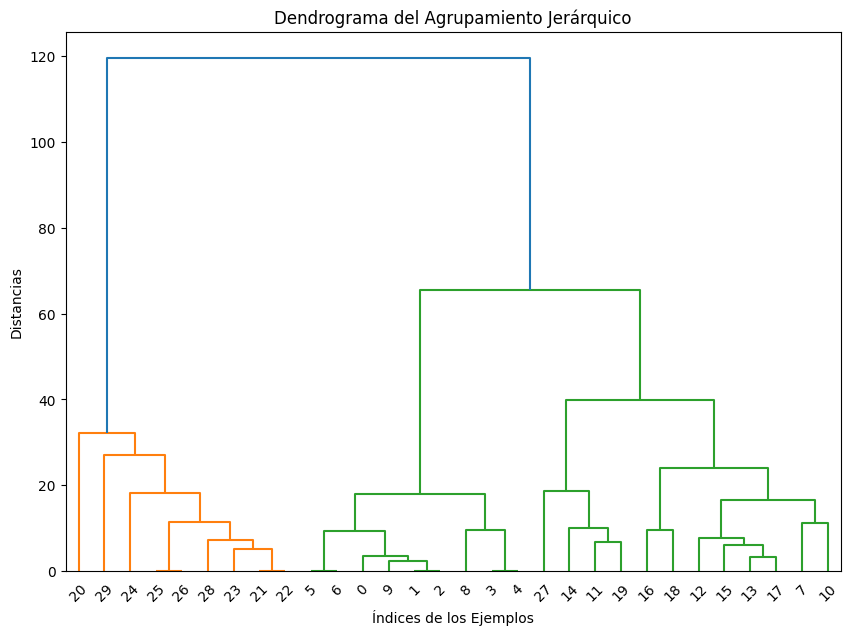

In [16]:
import matplotlib.pyplot as plt

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(Z)

plt.title('Dendrograma del Agrupamiento Jerárquico')
plt.xlabel('Índices de los Ejemplos')
plt.ylabel('Distancias')
plt.show()


Cada "paso" vertical representa la fusión de dos clústeres o elementos en un nuevo clúster, y la altura de ese paso indica la distancia a la que se realizó esa fusión. Las alturas más altas en el dendrograma indican fusiones menos naturales y más forzadas entre los clústeres, sugiriendo diferencias más significativas entre los grupos que se están uniendo.


**Identificación de Clústeres Potenciales**

Gran Salto en Distancia: Notamos que hay un salto muy significativo en altura (distancia) cerca de la parte superior del dendrograma. Esto sugiere que cualquier fusión más allá de este punto resultaría en una agrupación menos coherente y más forzada. Este salto ocurre en la línea azul, lo que sugiere un punto óptimo para cortar el dendrograma.

Número de Clústeres: Cortando el dendrograma en la altura donde ocurre este gran salto (alrededor de los 100 en la escala de distancia), se podrían definir dos clústeres principales. Estos dos clústeres representan, muy probablemente, las divisiones más naturales y significativas dentro de tus datos.


**Interpretación y Sugerencias**

Dos Clústeres Principales: Al cortar el dendrograma a una altura de 100, se identifican dos clústeres grandes, lo que indica una estructura de datos con dos subdivisiones principales muy distintas entre sí.

Consideración de Clústeres Menores: Si se desean más clústeres más granulares, se podría considerar cortar a niveles inferiores de altura. Observa las alturas menores a 40 para subdivisiones más detalladas dentro de cada uno de los dos grupos principales.
